#  PRCP-1024-TexasSalaryPrediction

### Problem Statement

The Texas Tribune has provided a dataset containing information on government employees' annual salaries and related attributes. The goal of this project is to conduct a comprehensive data analysis and develop a predictive regression model to assist the Texas state government in understanding and forecasting payroll information for its employees

### Attribute Information   
1.Agency

2.Agency Name

3.Last Name

4.First Name

5.MI (Middle Initial)

6.Class title

7.Ethnicity

8.Gender

9.Status

10.Employ Date

11.Hourly rate

12.Hrs per week

13.Monthly (Monthly income)

14.Annual (Annual Income)

15.State number


# 1.IMPORTING LIBRARIES

In [4]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline


# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore') 
# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import r2_score

# Importing LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Importing DecisionTreeRegressor model from sklearn
from sklearn.tree import DecisionTreeRegressor

# Importing RandomForestRegressor model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Importing MLPRegressor model from sklearn
from sklearn.neural_network import MLPRegressor

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

D:\newjurney\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2.LOADING DATA

In [5]:
#loading the data using pandas 
data=pd.read_csv("salary.csv")
         

# 3.BASIC CHECKS

In [6]:
# Visualize first 5 rows of the data
data.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

   ... HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  duplicated  \
0  ...  75.96150        29.0  9545.82  114549.84        127717        True   
1  ...  81.04454         4.0  1404.77   16857.24        127717        True   
2  ...  75.96150        29.0  9545.82  114549.84         59115        True   
3  ...  81.04453         4.0  1404.77   16857.24         59115        True   
4  ...   0.00000        40.0  3284.27   39411.24        165030        True   

  multiple_full_time_jobs  combined_multiple_jobs summed_annual_salary  \
0                     NaN                     NaN            131407.08   
1                     NaN                     NaN                  NaN   
2                     NaN                     NaN            131407.08   
3                     NaN                     NaN                  NaN   
4                     1.0                     NaN                  NaN   

   hide_from_search  
0               NaN  
1              True  
2               NaN  
3              True  
4               NaN  

[5 rows x 21 columns]

In [4]:
# Visualize last 5 rows of the data
data.tail()

AGENCY                                        AGENCY NAME  \
149476     809  STATE PRESERVATION BOARD                      ...   
149477     809  STATE PRESERVATION BOARD                      ...   
149478     809  STATE PRESERVATION BOARD                      ...   
149479     809  STATE PRESERVATION BOARD                      ...   
149480     809  STATE PRESERVATION BOARD                      ...   

                             LAST NAME                      FIRST NAME MI  \
149476  WESSELS                         JOHN                            P   
149477  WINDHAM                         EVAN                            A   
149478  WRIGHT                          DERRICK                         C   
149479  YOUNG                           DOUGLAS                         R   
149480  ZUNKER                          GEORGIA                         P   

       CLASS CODE                                        CLASS TITLE  \
149476   6232      SECURITY OFFICER III                          ...   
149477   0302      WEB ADMINISTRATOR III                         ...   
149478   0130      CUSTOMER SERVICE REP I                        ...   
149479   1572      PROGRAM SPECIALIST III                        ...   
149480   0130      CUSTOMER SERVICE REP I                        ...   

              ETHNICITY           GENDER  \
149476  WHITE            MALE              
149477  WHITE            FEMALE            
149478  WHITE            MALE              
149479  WHITE            MALE              
149480  WHITE            FEMALE            

                                          STATUS  ... HRLY RATE  HRS PER WK  \
149476  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149477  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149478  CRP - CLASSIFIED REGULAR PART-TIME        ...     12.93        20.0   
149479  CRF - CLASSIFIED REGULAR FULL-TIME        ...      0.00        40.0   
149480  CRP - CLASSIFIED REGULAR PART-TIME        ...     11.74        20.0   

        MONTHLY    ANNUAL  STATE NUMBER  duplicated multiple_full_time_jobs  \
149476  2899.00  34788.00        770781         NaN                     NaN   
149477  5500.00  66000.00        847431         NaN                     NaN   
149478  1120.60  13447.20         34266         NaN                     NaN   
149479  5744.16  68929.92        123490         NaN                     NaN   
149480  1017.46  12209.52        103583         NaN                     NaN   

        combined_multiple_jobs summed_annual_salary  hide_from_search  
149476                     NaN                  NaN               NaN  
149477                     NaN                  NaN               NaN  
149478                     NaN                  NaN               NaN  
149479                     NaN                  NaN               NaN  
149480                     NaN                  NaN               NaN  

[5 rows x 21 columns]

In [3]:
# Checking the number of rows and number of columns of the data
data.shape

(149481, 21)

#### Insight:
   the salary dataset contains 149481 rows and 21 columns

In [4]:
# Checking names of the columns in the data
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

# DOMAIN ANALYSIS

1.Agency:
         The Organization or department within  the texas state government
         
2.Agency Name: 
              the spacific name of the agency or department
              
3.Last Name:
            last name of the employee
            
4.First Name:
             First name of the employee
             
5.MI (Middle Initial):
                      The middle initial of the employee
                      
6.Class code:
            A unique identifier for the job title or classification of the employee.
            
7.Class Title:
              The official job title or classification of the employee.
              
8.Ethnicity: 
            The ethnic background of the employee.
            
9.Gender: 
         The gender of the employee.
         
10.Status: 
          The employment status of the employee (e.g.,  CTP-CLASSIFIED TEMPORARY PART-TIME ,URP - UNCLASSIFIED REGULAR PART-TIME   ,CRF - CLASSIFIED REGULAR FULL-TIME .. ).
          
11.Employee Date: 
                 The date when the employee was hired.
                 
12.Hrly Rate: 
             The hourly wage of the employee.
             
13.Hrs per Week: 
                The number of hours worked per week by the employee.
                
14.Monthly: 
           The monthly salary of the employee.
           
15.Annual: 
           The annual salary of the employee.
           
16.State Number: 
                 A unique identifier assigned to the employee by the state.
                 
17.Duplicated: 
              Indicates if the record is a duplicate entry.
              
18.Multiple Full-Time Jobs: 
                           Indicates if the employee holds multiple full-time jobs.
                           
19.Combined Multiple Jobs: 
                          Indicates if the record combines multiple job roles into one entry.
                          
20.Summed Annual Salary: 
                        The total annual salary when combining multiple job roles or positions.
                        
21.Hide from Search: 
                    Indicates if the record should be hidden from search results for privacy or other reasons

In [7]:
# Checking index of the data
data.index

RangeIndex(start=0, stop=149481, step=1)

In [8]:
# Checking basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

Insights:

1.out of 21 columns  16 columns has 149481 non-null values

2.five columns have null values 

3.six columns contain float as a datatype

4.two columns contain int  as a datatype

.thirteen columns contain object as a datatype

In [7]:
#Dropping unwanted columns in the dataframe
data.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],axis='columns',inplace=True)

Insight:
    the above columns are have less than 10% of data ,so it   considered  as a unwanted  columns  
     with this column we cannot notice  any important  info and by dropping this column which will be helpfull for further      work.

In [6]:
#Checking basic statistical information for numarical columns
data.describe()

AGENCY      HRLY RATE     HRS PER WK        MONTHLY  \
count  149481.000000  149481.000000  149481.000000  149481.000000   
mean      545.736288       0.346488      39.714918    4226.184248   
std       139.057691       4.211485       2.323855    2093.111691   
min       101.000000       0.000000       1.000000      50.000000   
25%       529.000000       0.000000      40.000000    3019.840000   
50%       530.000000       0.000000      40.000000    3720.170000   
75%       696.000000       0.000000      40.000000    4865.810000   
max       930.000000     117.788480      70.000000   46125.000000   

              ANNUAL  STATE NUMBER  
count  149481.000000  1.494810e+05  
mean    50714.210973  5.651930e+05  
std     25117.340292  4.786212e+05  
min       600.000000  1.000000e+00  
25%     36238.080000  1.133340e+05  
50%     44642.040000  3.463730e+05  
75%     58389.720000  1.100500e+06  
max    553500.000000  1.271604e+06

insights:
The large standard deviations for MONTHLY, ANNUAL, and STATE NUMBER indicate high variability within the data.

In [6]:
#Checking basic statistical information for categorical columns
data.describe(exclude=['int','float'])

AGENCY NAME  \
count                                              149481   
unique                                                113   
top     HEALTH AND HUMAN SERVICES COMMISSION          ...   
freq                                                36667   

                             LAST NAME                      FIRST NAME  \
count                           149481                          149481   
unique                           38675                           23559   
top     SMITH                           MICHAEL                          
freq                              1243                            1843   

            MI CLASS CODE                                        CLASS TITLE  \
count   149481     149481                                             149481   
unique      27       1481                                               1422   
top              4504      CORREC  OFFICER IV                            ...   
freq     38408       9267                                               9267   

              ETHNICITY           GENDER  \
count            149481           149481   
unique                6                2   
top     WHITE            FEMALE            
freq              67142            85328   

                                          STATUS EMPLOY DATE  
count                                     149481      149481  
unique                                        11        6295  
top     CRF - CLASSIFIED REGULAR FULL-TIME          09/01/17  
freq                                      142502       12359

In [8]:
# Extracting numerical columns from the data
data_num=data.select_dtypes(['int','float'])

In [9]:
# Extracting categorical columns from the data
data_cat=data.select_dtypes('object')
data_cat.columns


Index(['AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE'],
      dtype='object')

In [14]:
#checking the value counts for categorical columns
for i in data_cat:
    print(data[i].value_counts())
    print('------------------------------------')

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: count, Length: 113, dtype: int64
------------------------------------
LAST NAME
SMITH                             1243
GARCIA                            1180
WILLIAMS                          1155
JOHNSON                           1123
MARTINEZ                          1091
                                  ... 
RICHARDS

In [15]:
#checking the value counts for numarical columns
for i in data_num:
    print(data[i].value_counts())
    print('------------------------------------')

AGENCY
529    36667
696    35926
601    13099
530    12588
405    10097
       ...  
364        7
481        5
213        4
464        4
510        1
Name: count, Length: 113, dtype: int64
------------------------------------
HRLY RATE
0.00000     147733
75.96150       323
18.00000       104
19.00000        95
67.30765        74
             ...  
13.34336         1
12.55817         1
31.06644         1
21.52511         1
11.74000         1
Name: count, Length: 206, dtype: int64
------------------------------------
HRS PER WK
40.00    146872
20.00      1339
29.00       397
30.00       210
19.00       148
35.00       123
36.25        78
24.00        78
10.00        31
25.00        25
16.00        21
32.00        21
4.00         14
8.00         12
15.00        11
39.60         8
36.24         8
50.00         8
60.00         6
41.00         5
19.20         5
5.00          5
12.00         5
18.00         4
70.00         4
36.00         3
28.00         3
27.00         2
26.00         2
1.00

In [9]:
#checking skewness for numerical
for i in data_num:

    print(f" column {i},skewness of {data[i].skew()}")
   

 column AGENCY,skewness of -0.6048740931591002
 column HRLY RATE,skewness of 15.91809864054434
 column HRS PER WK,skewness of -8.379277707265828
 column MONTHLY,skewness of 2.7028045602110256
 column ANNUAL,skewness of 2.7028045602110278
 column STATE NUMBER,skewness of 0.24716072700062366


# 4. EXPLORATORY DATA ANALYSIS(EDA)

In [10]:
# Creating profile report
report = ProfileReport(data, title="Profiling Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
#checking correlation for numerical feacture
corr=data_num.corr()
corr

AGENCY  HRLY RATE  HRS PER WK   MONTHLY    ANNUAL  \
AGENCY        1.000000  -0.083653   -0.013847 -0.266452 -0.266452   
HRLY RATE    -0.083653   1.000000   -0.337784  0.086291  0.086291   
HRS PER WK   -0.013847  -0.337784    1.000000  0.096041  0.096041   
MONTHLY      -0.266452   0.086291    0.096041  1.000000  1.000000   
ANNUAL       -0.266452   0.086291    0.096041  1.000000  1.000000   
STATE NUMBER  0.060815  -0.007922   -0.010072 -0.265438 -0.265438   

              STATE NUMBER  
AGENCY            0.060815  
HRLY RATE        -0.007922  
HRS PER WK       -0.010072  
MONTHLY          -0.265438  
ANNUAL           -0.265438  
STATE NUMBER      1.000000

insights:
       
     1.Agency (-0.266452) moderate negative correlation with  MONTHLY and ANNUAL,but not very strong
     2.No features highly correlated to the target
        

# 4.1UNIVARIATE ANALYSIS

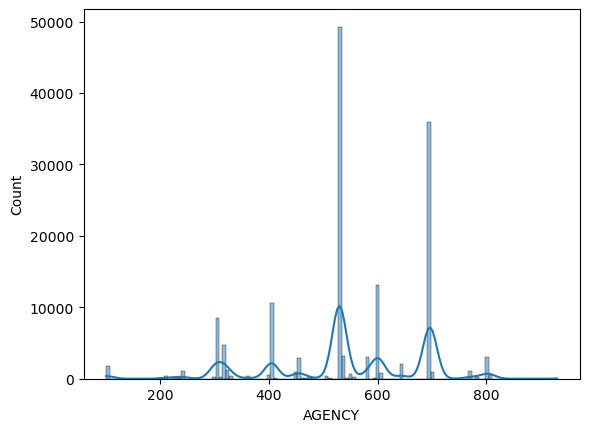

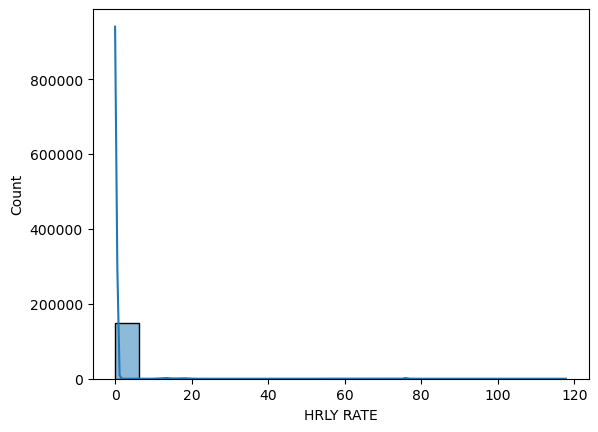

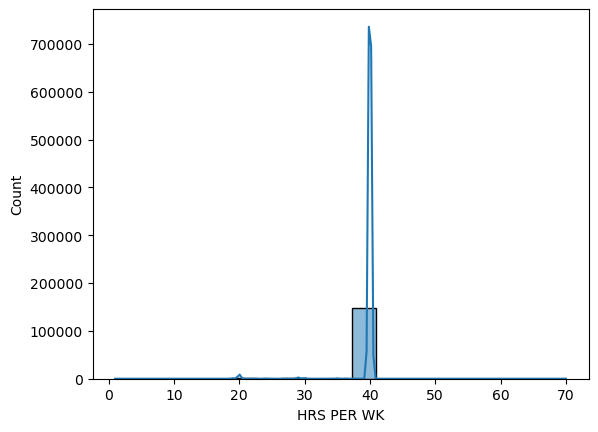

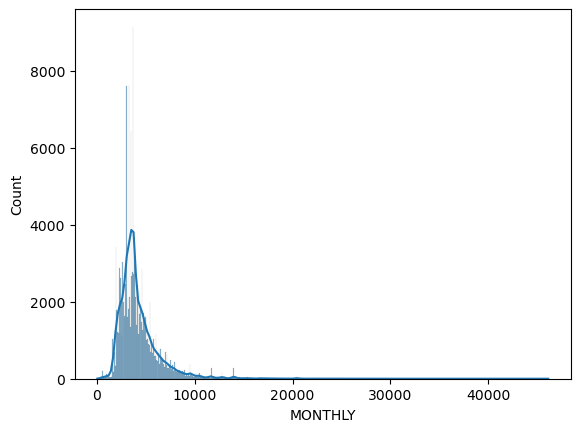

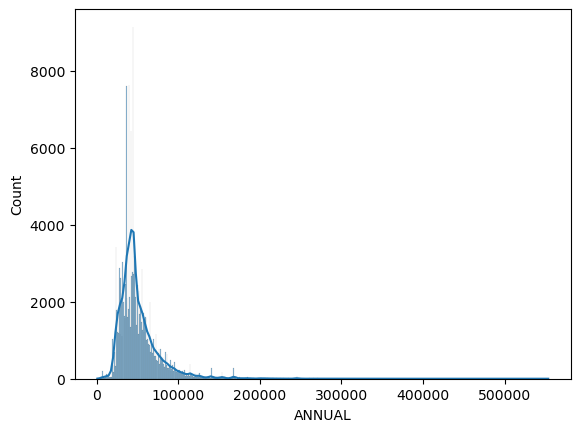

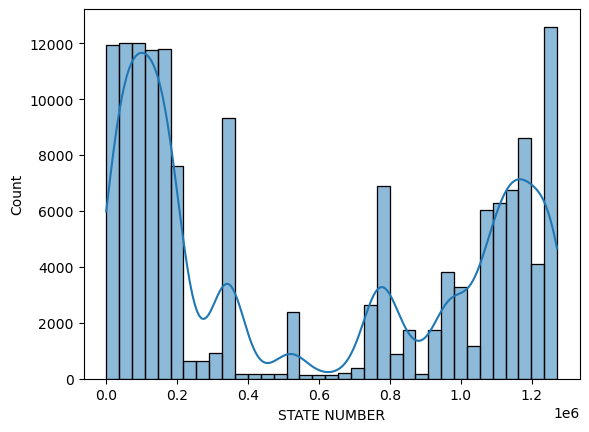

In [18]:
#UNIVARIATE ANALYSIS FOR NUMERICAL COLUMNS
#histogram for numerical columnd in the dataset
for i in data_num:
    sns.histplot(data,x=i,kde=True)
    plt.show()

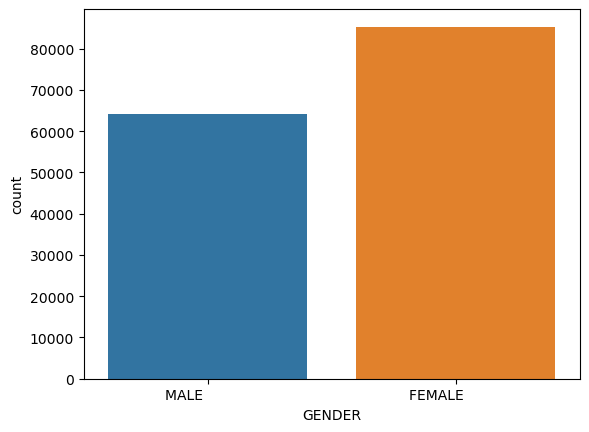

In [140]:
#Univariate analysis for GENDER column
sns.countplot(data,x='GENDER')
plt.show()

Insights:
    
    1.Agency "529" have the highest value counts the Agency column and highest agency is "696"
    2.the hrly rate column have wide range of distribution and frequancy at "0" is high
    3.The data in the Annual exhibit a right-skewed distribution.
    4.the hrsperwk data reveals that the vast majority of workers (146,872) are clocking in 40 hours a week.
    5.HRLY_ RATE and MONTHLY is having left skewed distribution.
    6.The majority of an employee is less than 10000 dollars per month.
    7.All the numerical columns are not in normal distribution
    8.female  employs are higher than male employ

# 4.2BIVARIATE ANALYASIS 

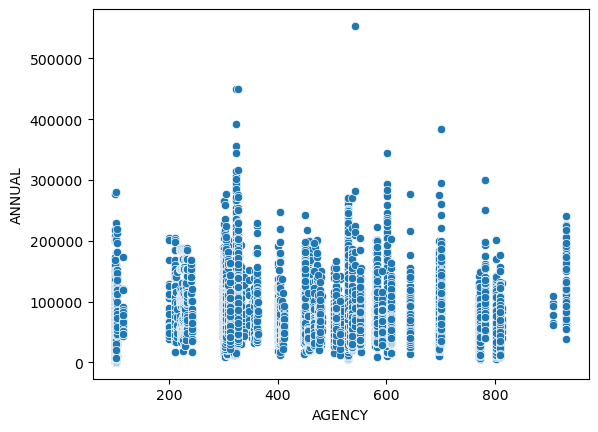

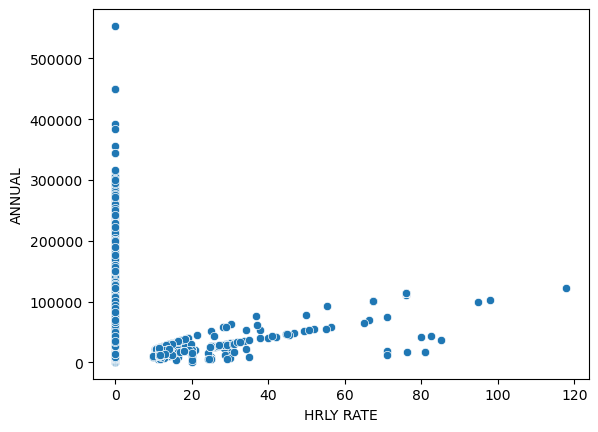

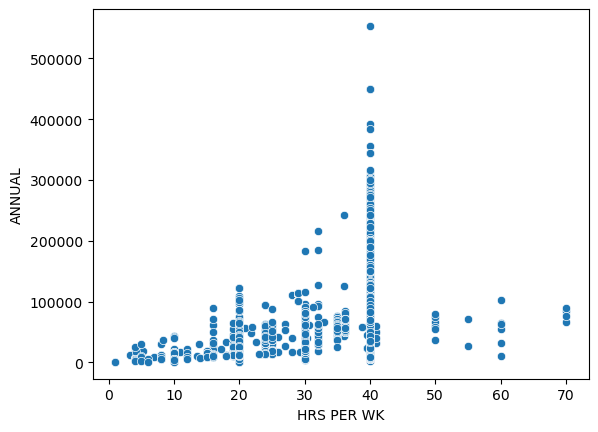

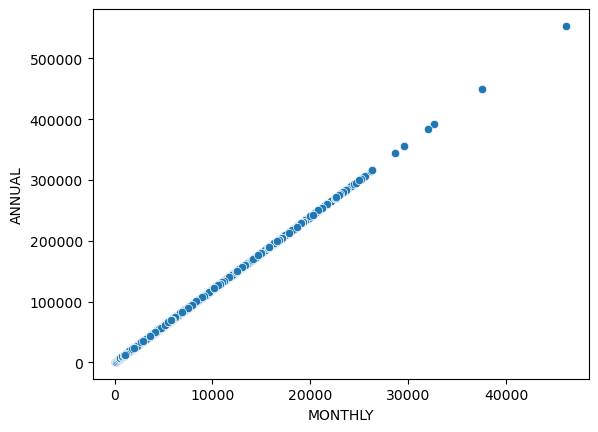

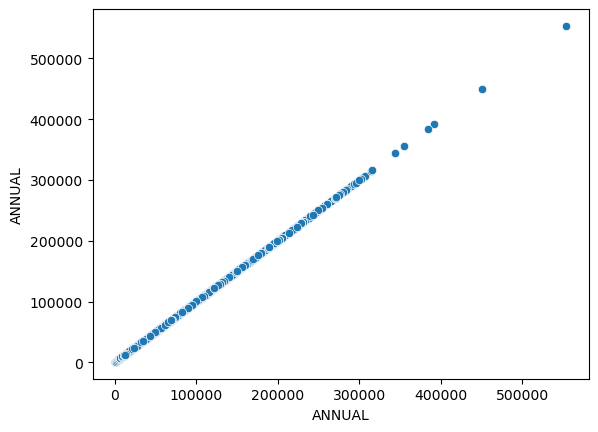

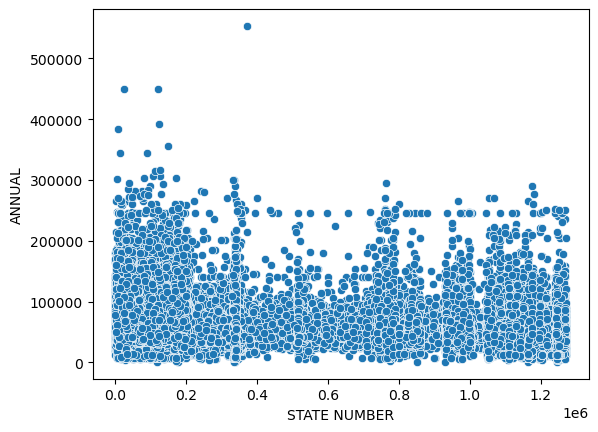

In [15]:
#SCatter plot for numerical column data with "ANNUAL" column
for i in data_num:
    sns.scatterplot(data,x=i,y="ANNUAL")
    plt.show()

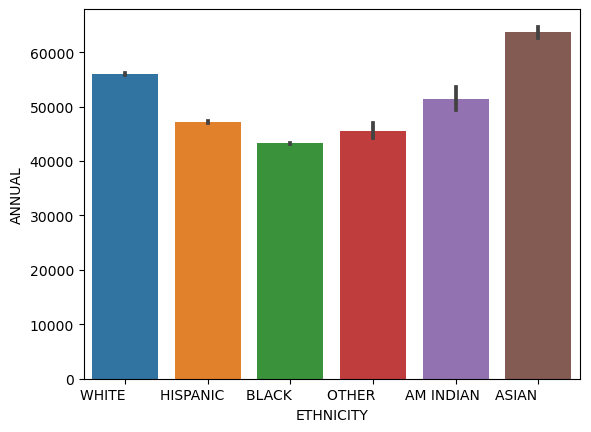

In [16]:
#Bivariate analysis for ethinicity column with Annual
sns.barplot(data,x="ETHNICITY",y="ANNUAL")
plt.show()

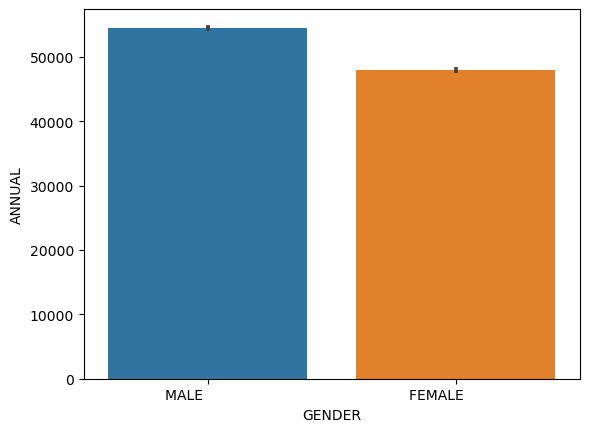

In [17]:
#Bivariate analysis for Gender column with Annual
sns.barplot(data,x="GENDER",y="ANNUAL")
plt.show()

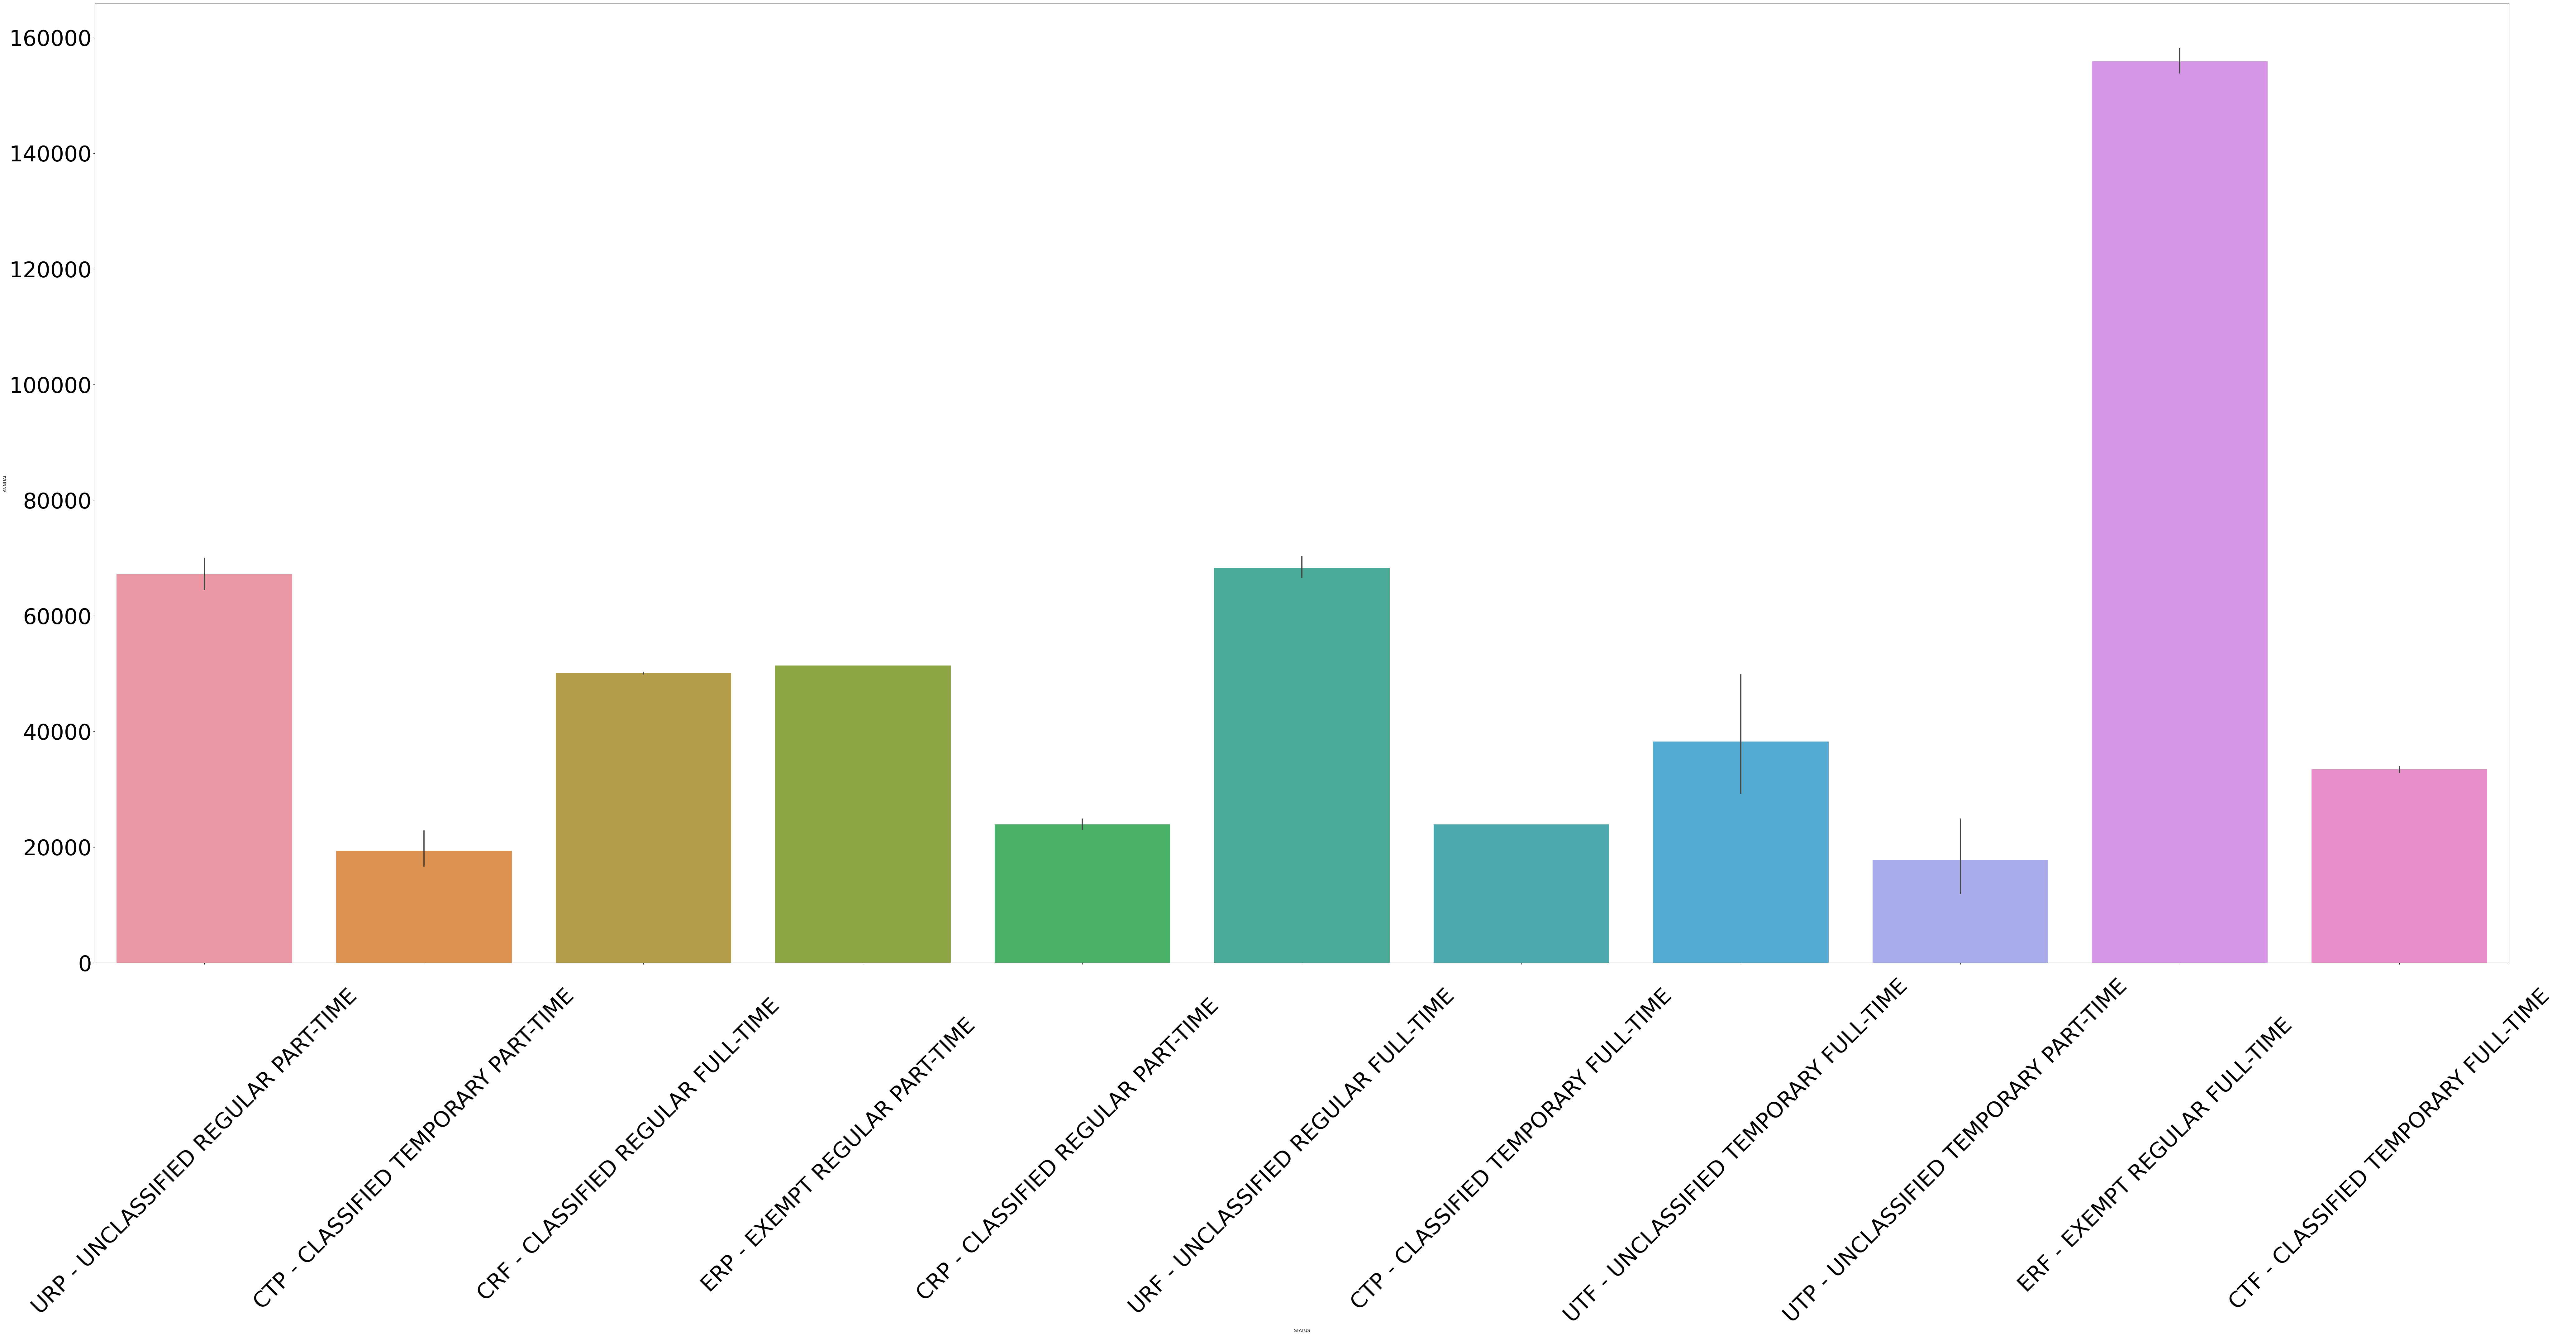

In [18]:
#Bivariate analysis for status column with Annual
plt.figure(figsize=(100,40))
sns.barplot(data,x='STATUS',y='ANNUAL')
plt.xticks(rotation=45,fontsize=50)
plt.yticks(fontsize=50)
plt.show()

Insights:
    
1.The Agencies are paying less than "200000$" to their majority of employees per year.

2.The people who are working around 30-40 HRS_PER_WEEK are getting high salaries compared to others.

3.The maximum salary's are earned by  EXEMPT REGULAR FULL TIME.

4.Male employee getting payroll higher than female

5.Asian ethnicity have more than 60,000$ payroll

6.Black people get less salary

7.monthly and annual columns have linear relationship
    

# 4.3 MULTI-VARIATE ANALYSIS

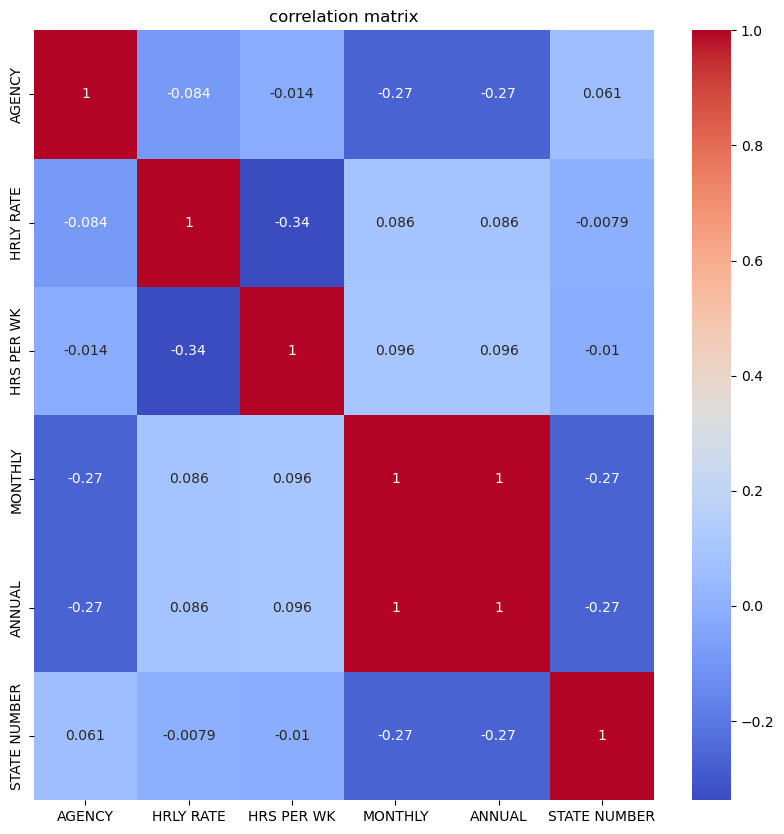

In [143]:

plt.figure(figsize=(10,10),facecolor='white')
sns.heatmap(data=data_num.corr(),annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

 Insight:
        1.accross the columns  MONTHLY AND ANNUAL are highly correlated

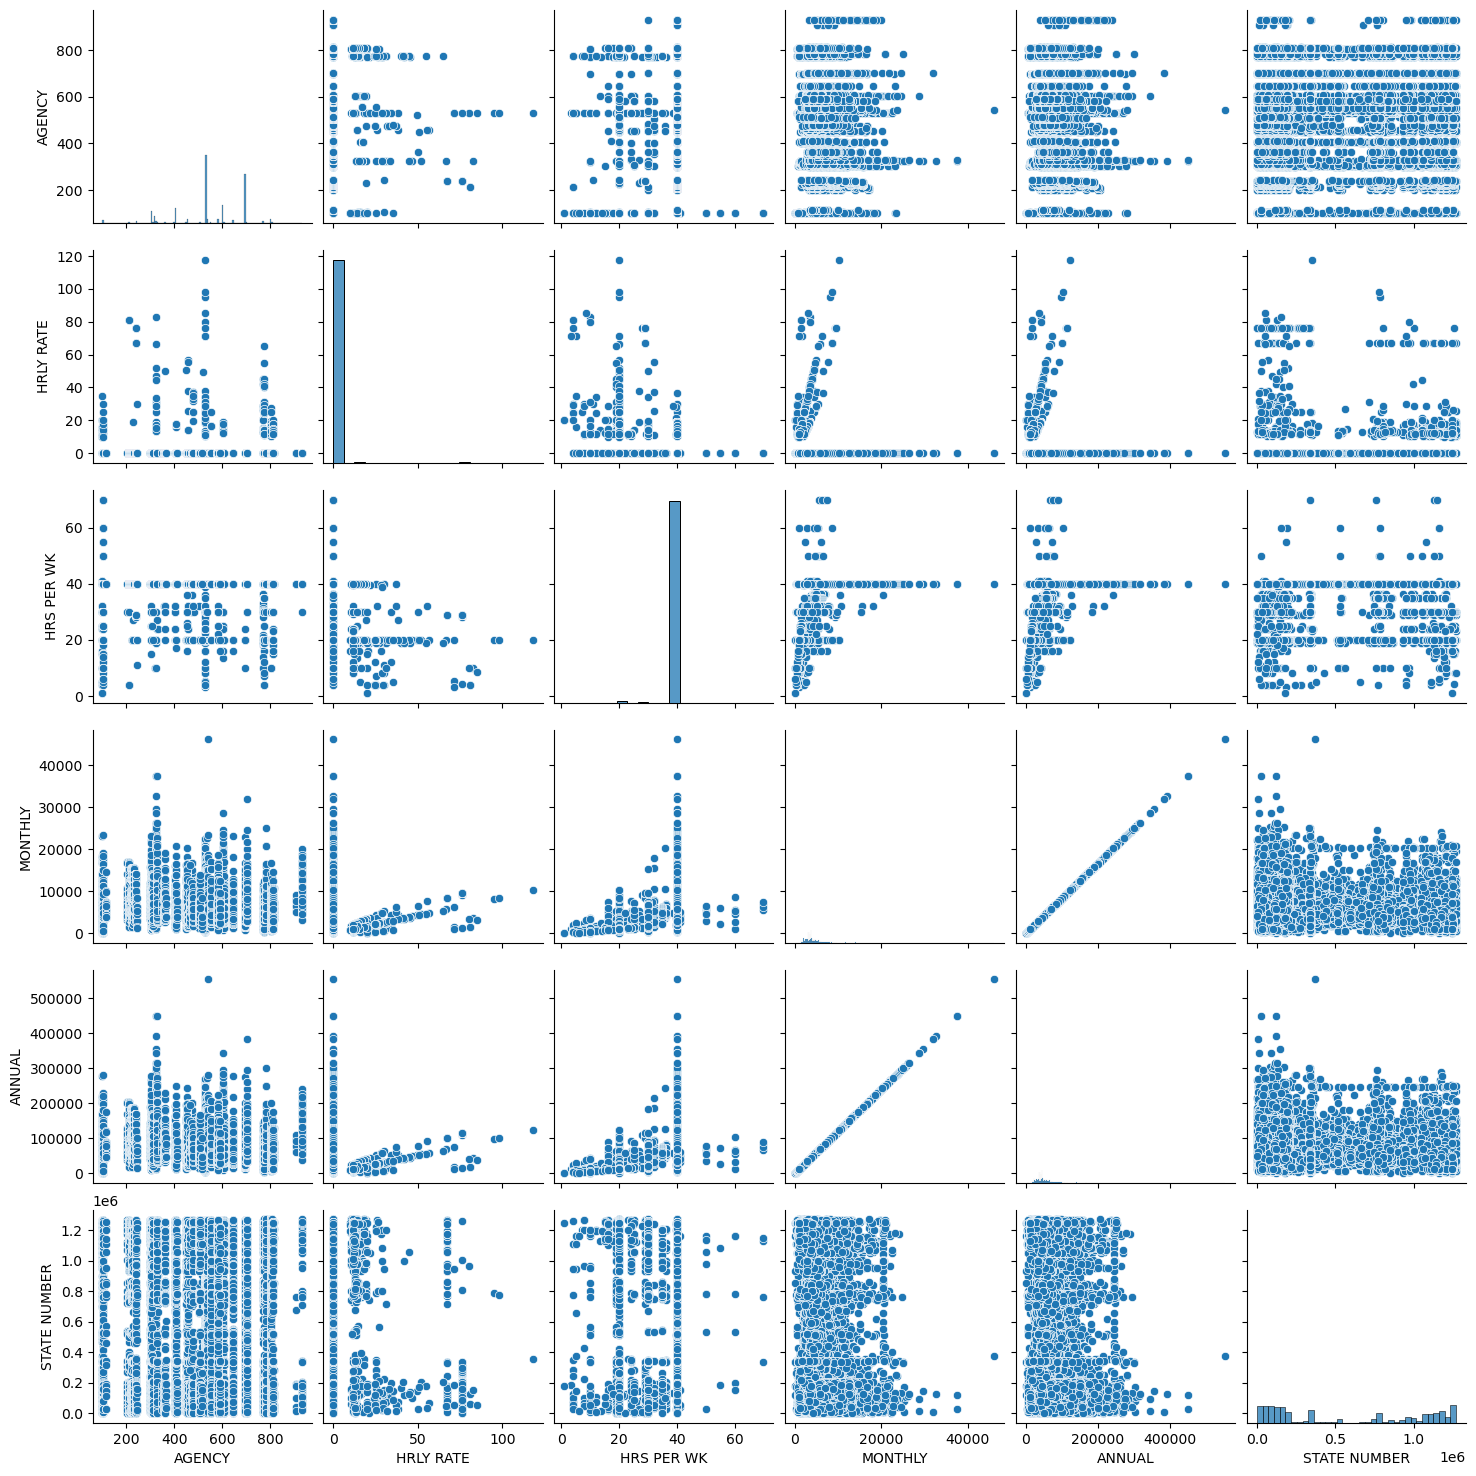

In [20]:
#pairplot for the entire dataframe
sns.pairplot(data=data)
plt.show()

# 5.DATA  PREPROCESSING

## 5.1.Handling  Null Values

In [10]:
# Checking null values
data.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

Insights:
        1.the columns does'nt have null values

## 5.2.Handling  Duplicate values

In [11]:
#checking for duplicate values
data.duplicated().sum()

0

Insight:
    the columns do not have any duplicate records

## 5.3.Encoding

### 5.3.1 CLASS CODE

In [11]:
#encoding CLASS CODE column to convert categorical to numerical
#initializing the LabelEncoder()
LE=LabelEncoder()

In [12]:
#fit and transform the CLASS CODE column
data['class_code_encoder']=LE.fit_transform(data['CLASS CODE'])

In [13]:
#dropping the CLASS CODE column after encoding 
data.drop('CLASS CODE',axis=1,inplace=True)

### 5.3.2 CLASS TITLE

In [14]:
#encoding CLASS TITLE column to convert categorical to numerical 
#Initializing the LabelEncoder()
le=LabelEncoder() 

In [15]:
##fit and transform the CLASS TITLE column
data['class_title_encoder']=le.fit_transform(data['CLASS TITLE'])

In [16]:
#dropping the CLASS TITLE column after encoding
data.drop('CLASS TITLE',axis=1,inplace=True)

### 5.3.3 STATUS

In [17]:
#encoding STATUS  column to convert categorical to numerical
#Initializing the OneHotEncoder()
OHE= OneHotEncoder()

In [18]:
####fit and transform the CLASS TITLE column
ohe_status=OHE.fit_transform(data[['STATUS']]) .toarray()

In [19]:
#getting the STATUS column feature
data['STATUS'].unique()

array(['URP - UNCLASSIFIED REGULAR PART-TIME    ',
       'CTP - CLASSIFIED TEMPORARY PART-TIME    ',
       'CRF - CLASSIFIED REGULAR FULL-TIME      ',
       'ERP - EXEMPT REGULAR PART-TIME          ',
       'CRP - CLASSIFIED REGULAR PART-TIME      ',
       'URF - UNCLASSIFIED REGULAR FULL-TIME    ',
       'CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
       'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
       'UTP - UNCLASSIFIED TEMPORARY PART-TIME  ',
       'ERF - EXEMPT REGULAR FULL-TIME          ',
       'CTF - CLASSIFIED TEMPORARY FULL-TIME    '], dtype=object)

In [20]:
#creating a DATAFRAME of encoded STATUS column
status_encoder_df=pd.DataFrame(ohe_status,columns=['URP - UNCLASSIFIED REGULAR PART-TIME    ',
                                                   'CTP - CLASSIFIED TEMPORARY PART-TIME    ',
                                                   'CRF - CLASSIFIED REGULAR FULL-TIME      ',
                                                   'ERP - EXEMPT REGULAR PART-TIME          ',
                                                   'CRP - CLASSIFIED REGULAR PART-TIME      ',
                                                   'URF - UNCLASSIFIED REGULAR FULL-TIME    ',
                                                   'CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
                                                   'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
                                                   'UTP - UNCLASSIFIED TEMPORARY PART-TIME  ',
                                                   'ERF - EXEMPT REGULAR FULL-TIME          ',
                                                   'CTF - CLASSIFIED TEMPORARY FULL-TIME    '])

In [21]:
# Dropping first column from STATUS_encoded_df
status_encoder_df.drop('CTP - CLASSIFIED TEMPORARY PART-TIME    ',axis=1,inplace=True)

Insight:
      Dropping  column 'CTP - CLASSIFIED TEMPORARY PART-TIME    ' to avoid Multicollinearity

In [22]:
# concatenating  status_encoder_df dataframe and data  dataframe after onehotencoding
data=pd.concat([data,status_encoder_df],axis=1)


In [23]:
#Removing STATUS column from the data
data.drop('STATUS',axis=1,inplace=True)

### 5.3.4 ETHNICITY    

In [24]:
#encoding ETHNICITY  column to convert categorical to numerical
#Initializing the OneHotEncoder()
ohe=OneHotEncoder()

In [25]:
#fit amd transform the ETHNICITY column 
ohe_ethnicity=ohe.fit_transform(data[['ETHNICITY']]).toarray()

In [26]:
#getting the ETHNICITY column feature
data.ETHNICITY.unique()

array(['WHITE          ', 'HISPANIC       ', 'BLACK          ',
       'OTHER          ', 'AM INDIAN      ', 'ASIAN          '],
      dtype=object)

In [27]:
##creating a DATAFRAME of encoded ETHNICITY column
ohe_ethnicity_df=pd.DataFrame(ohe_ethnicity,columns=['WHITE', 'HISPANIC', 'BLACK ','OTHER', 'AM INDIAN', 'ASIAN'])

In [28]:
# Dropping first column from STATUS_encoded_df
ohe_ethnicity_df.drop('HISPANIC',axis=1,inplace=True)

Insight: Dropping column 'HISPANIC' to avoid Multicollinearity

In [29]:
# concatenating ohe_ethnicity_df  dataframe and data  dataframe after onehotencoding
data=pd.concat([data,ohe_ethnicity_df],axis=1)

In [30]:
#removing ETHNICITY column from data
data.drop('ETHNICITY',axis=1,inplace=True)

### 5.3.5 GENDER

In [31]:
#encoding GENDER  column to convert categorical to numerical
#Initializing label encoder
Le=LabelEncoder()

In [32]:
#fit and transform the GENDER column
gender_encoder=Le.fit_transform(data["GENDER"])

In [33]:
#adding encoding column to data
data['gender_encoder']=gender_encoder

In [34]:
#Removing GENDER column from the data 
data.drop("GENDER",axis=1,inplace=True)

 ### 5.3.6 Datetime encoding

the column 'EMPLOY DATE' contains datatime data in object format. So we will convert that into datetime format.

#### 5.3.6.1 EMPLOY DATE

In [35]:
#importing datetime 
from datetime import datetime as dt

In [36]:
#type convertion for EMPLOY DATE from object to datetime
data['EMPLOY DATE']=pd.to_datetime(data['EMPLOY DATE'])

In [37]:
#Extracting year from the 'EMPLOY DATE' column 
data['year_of_joining']=data['EMPLOY DATE'].dt.year

In [38]:
#checking the unique values in year_of_joining 
data['year_of_joining'].unique()

array([1988, 2015, 2020, 2018, 2019, 2016, 1999, 2011, 2009, 2010, 2017,
       2014, 2002, 2013, 2005, 2006, 2003, 1998, 2007, 2012, 2004, 2008,
       2000, 1996, 1982, 1986, 1991, 1994, 1976, 1997, 1992, 1985, 1990,
       1995, 2001, 1993, 1983, 1989, 1987, 1981, 1979, 1984, 1977, 1975,
       1978, 1980, 2071, 2072, 2073, 2069, 2068])

Insight:

    1.  the "year_of_joining" denote the year when the employ was hired.
    
    2 . there are seven number of row which have year_of_joining greater than 2025
    
    3.  since it cannot taken as valid data ,those records are considered as corrupted data and will be remove from the              dataset

In [39]:
#Extracting month from the "EMPLOY DATE"
data['joining_month']=data['EMPLOY DATE'].dt.month

In [40]:
#Extracting day from the "EMPLOY DATE"
data['joining_date']=data['EMPLOY DATE'].dt.day

In [41]:
#creating current date column 
data['current_date']=pd.Timestamp.now() 

In [42]:
#creating 'tendure_years' in data 
data['Tenure_Years'] = (data['current_date']- data['EMPLOY DATE']).dt.days / 365

In [43]:
#dropping columns year_of_joining,joining_month,joining_date,current_date,EMPLOY Date 
data.drop(['year_of_joining','joining_month','joining_date','current_date','EMPLOY DATE' ],axis=1,inplace=True)

insight:
    1.  columns year_of_joining,joining_month,joining_date,current_date,EMPLOY Date using this column we extract 
       tenure_years 

### 5.3.7 Handling Zeros 

#### 5.3.7.1 HRLY RATE       


Insight:
  
  1.since hrly rate does'nt have any null values but the hrly rate column have 147726 '0' value in it out of 149474 value 
   

In [44]:
## Calculate the hourly rate from monthly income
HRLY_RATE = data.apply(
    lambda row: (row['MONTHLY'] / (4 * row['HRS PER WK'])) if row['HRLY RATE'] == 0 else row['HRLY RATE'],axis=1)

In [45]:
#imputing the values in the 'HRLY RATE' column in data
data['HRLY RATE']=HRLY_RATE

Insight:
    the HRLY RATE column is right skewed

### 5.4.Scaling

####  5.4.1 HRLY RATE 

In [46]:
#Scaling the HRLY RATE column
#Initializing the MinMaxScaler()
mms=MinMaxScaler()

In [47]:
#fit and transform the HRLY RATE column
data['HRLY RATE']=mms.fit_transform(data[['HRLY RATE']])

#### 5.4.2 HRS PER WK

<Axes: xlabel='HRS PER WK', ylabel='Count'>

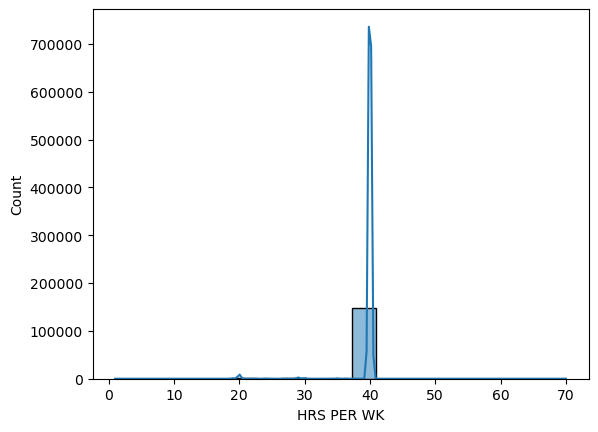

In [48]:
# Checking distribution of the column 'HRS PER WK'
sns.histplot(data,x='HRS PER WK',kde=True)

Insight:
The distribution is thin and tall. So we use MinMaxScaler for scaling this column

In [49]:
#Initializing MinMaxScaler()
#fit and transform the HRS PER WK column
MMS=MinMaxScaler()
data['HRS PER WK']=MMS.fit_transform(data[['HRS PER WK']])

### 5.4.Removing unwanted columns

#### AGENCY AND AGENCY NAME

In [50]:
#checking the AGENCY and AGENCY NAME have same unique values
print(len(data['AGENCY'].unique()))
print(len(data['AGENCY NAME'].unique()))

113
113


Insight:
    the AGENCY and AGENCY NAME have same number of unique values

In [51]:
# Checking Every AGENCY has unique AGENCY NAME
sum=0
for i in range(0,len(data.AGENCY.unique())):
    sum=sum+(data[['AGENCY','AGENCY NAME']].loc[data.AGENCY==data.AGENCY.unique()[i]].duplicated().sum())
if data.shape[0]-sum==len(data.AGENCY.unique()):
    print('Every AGENCY has unique AGENCY NAME')

Every AGENCY has unique AGENCY NAME


Insight:Since Every 'AGENCY' has unique 'AGENCY NAME', We will drop the column 'AGENCY NAME'

In [52]:
# Dropping 'AGENCY NAME' column
data.drop('AGENCY NAME',axis=1,inplace=True)

#### LAST NAME , FIRST NAME ,MI and STATE NUMBER

In [53]:
#Dropping LAST NAME , FIRST NAME ,MI and STATE NUMBER
data.drop(['LAST NAME','FIRST NAME','MI','STATE NUMBER'],axis=1,inplace=True)

Insights:
The columns 'LAST NAME', 'FIRST NAME', 'MI' and 'STATE NUMBER' are unique features and they are not necessary for model training. So we will remove these columns

## 5.5 Outliers handling

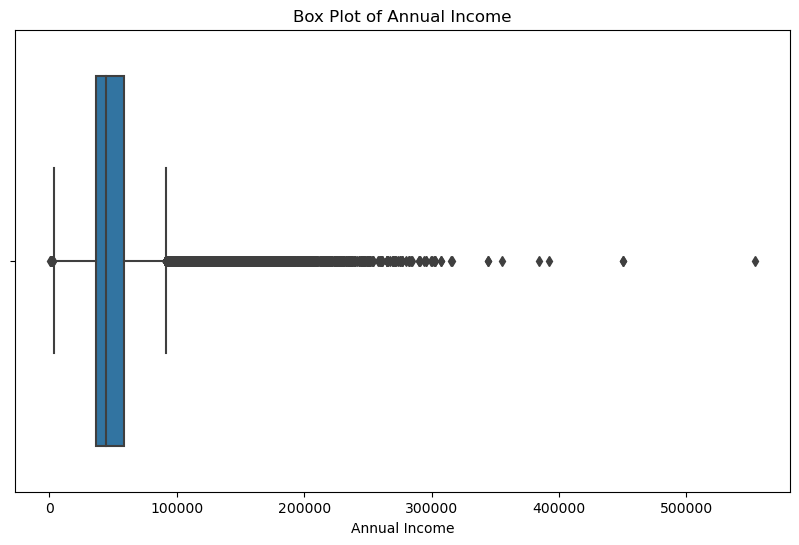

In [54]:
#checking outliers for ANNUAL  column
#visualizing the ANNUAL column using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['ANNUAL'])
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

In [55]:
#Identifying the outliers using IQR method
#finding Q1 and Q3
Q1=np.quantile(data['ANNUAL'],0.25)
Q3=np.quantile(data['ANNUAL'],0.75)
#finding IQR
IQR=Q3-Q1

In [56]:
#finding lower_limit and upper_limit
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR) 

In [57]:
#Extracting the outliers from data
data.loc[(data.ANNUAL<lower_limit) | (data.ANNUAL>upper_limit)]

AGENCY  HRLY RATE  HRS PER WK   MONTHLY     ANNUAL  \
0          241   0.260290    0.405797   9545.82  114549.84   
2          241   0.260290    0.405797   9545.82  114549.84   
5          302   0.276516    0.565217  12899.00  154788.00   
7          510   0.213391    0.565217  10000.00  120000.00   
36         101   0.169842    0.565217   8000.00   96000.00   
...        ...        ...         ...       ...        ...   
149374     809   0.226093    0.565217  10583.34  127000.08   
149393     809   0.177646    0.565217   8358.41  100300.92   
149401     809   0.168028    0.565217   7916.67   95000.04   
149415     809   0.217487    0.565217  10188.09  122257.08   
149475     809   0.314988    0.565217  14665.83  175989.96   

        class_code_encoder  class_title_encoder  \
0                     1409                  711   
2                     1409                  711   
5                      299                  399   
7                      299                  399   
36                    1073                  750   
...                    ...                  ...   
149374                 299                  399   
149393                 293                  856   
149401                 292                  855   
149415                 298                  398   
149475                1365                  494   

        URP - UNCLASSIFIED REGULAR PART-TIME      \
0                                            0.0   
2                                            0.0   
5                                            1.0   
7                                            1.0   
36                                           0.0   
...                                          ...   
149374                                       1.0   
149393                                       1.0   
149401                                       1.0   
149415                                       1.0   
149475                                       0.0   

        CRF - CLASSIFIED REGULAR FULL-TIME        \
0                                            0.0   
2                                            0.0   
5                                            0.0   
7                                            0.0   
36                                           0.0   
...                                          ...   
149374                                       0.0   
149393                                       0.0   
149401                                       0.0   
149415                                       0.0   
149475                                       0.0   

        ERP - EXEMPT REGULAR PART-TIME            ...  \
0                                            0.0  ...   
2                                            0.0  ...   
5                                            0.0  ...   
7                                            0.0  ...   
36                                           0.0  ...   
...                                          ...  ...   
149374                                       0.0  ...   
149393                                       0.0  ...   
149401                                       0.0  ...   
149415                                       0.0  ...   
149475                                       0.0  ...   

        UTP - UNCLASSIFIED TEMPORARY PART-TIME    \
0                                            1.0   
2                                            1.0   
5                                            0.0   
7                                            0.0   
36                                           0.0   
...                                          ...   
149374                                       0.0   
149393                                       0.0   
149401                                       0.0   
149415                                       0.0   
149475                                       0.0   

        ERF - EXEMPT REGULAR FULL-TIME            \
0                                     

In [58]:
#Including outliers
Q1=np.quantile(data['ANNUAL'],0.25)
Q3=np.quantile(data['ANNUAL'],1.0)
IQR=Q3-Q1
#finding lower_limit and upper_limit
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR) 
#Extracting the outliers from data
data.loc[(data.ANNUAL<lower_limit) | (data.ANNUAL>upper_limit)]

Empty DataFrame
Columns: [AGENCY, HRLY RATE, HRS PER WK, MONTHLY, ANNUAL, class_code_encoder, class_title_encoder, URP - UNCLASSIFIED REGULAR PART-TIME    , CRF - CLASSIFIED REGULAR FULL-TIME      , ERP - EXEMPT REGULAR PART-TIME          , CRP - CLASSIFIED REGULAR PART-TIME      , URF - UNCLASSIFIED REGULAR FULL-TIME    , CTP - CLASSIFIED TEMPORARY FULL-TIME    , UTF - UNCLASSIFIED TEMPORARY FULL-TIME  , UTP - UNCLASSIFIED TEMPORARY PART-TIME  , ERF - EXEMPT REGULAR FULL-TIME          , CTF - CLASSIFIED TEMPORARY FULL-TIME    , WHITE, BLACK , OTHER, AM INDIAN, ASIAN, gender_encoder, Tenure_Years]
Index: []

[0 rows x 24 columns]

Insight :
        ANNUAL salary column contains outliers which have extreme values ,but it can be considered as valid datapoints
        since the class titles like "senior scientist" have the capability of getting those extrem value salary.  
            

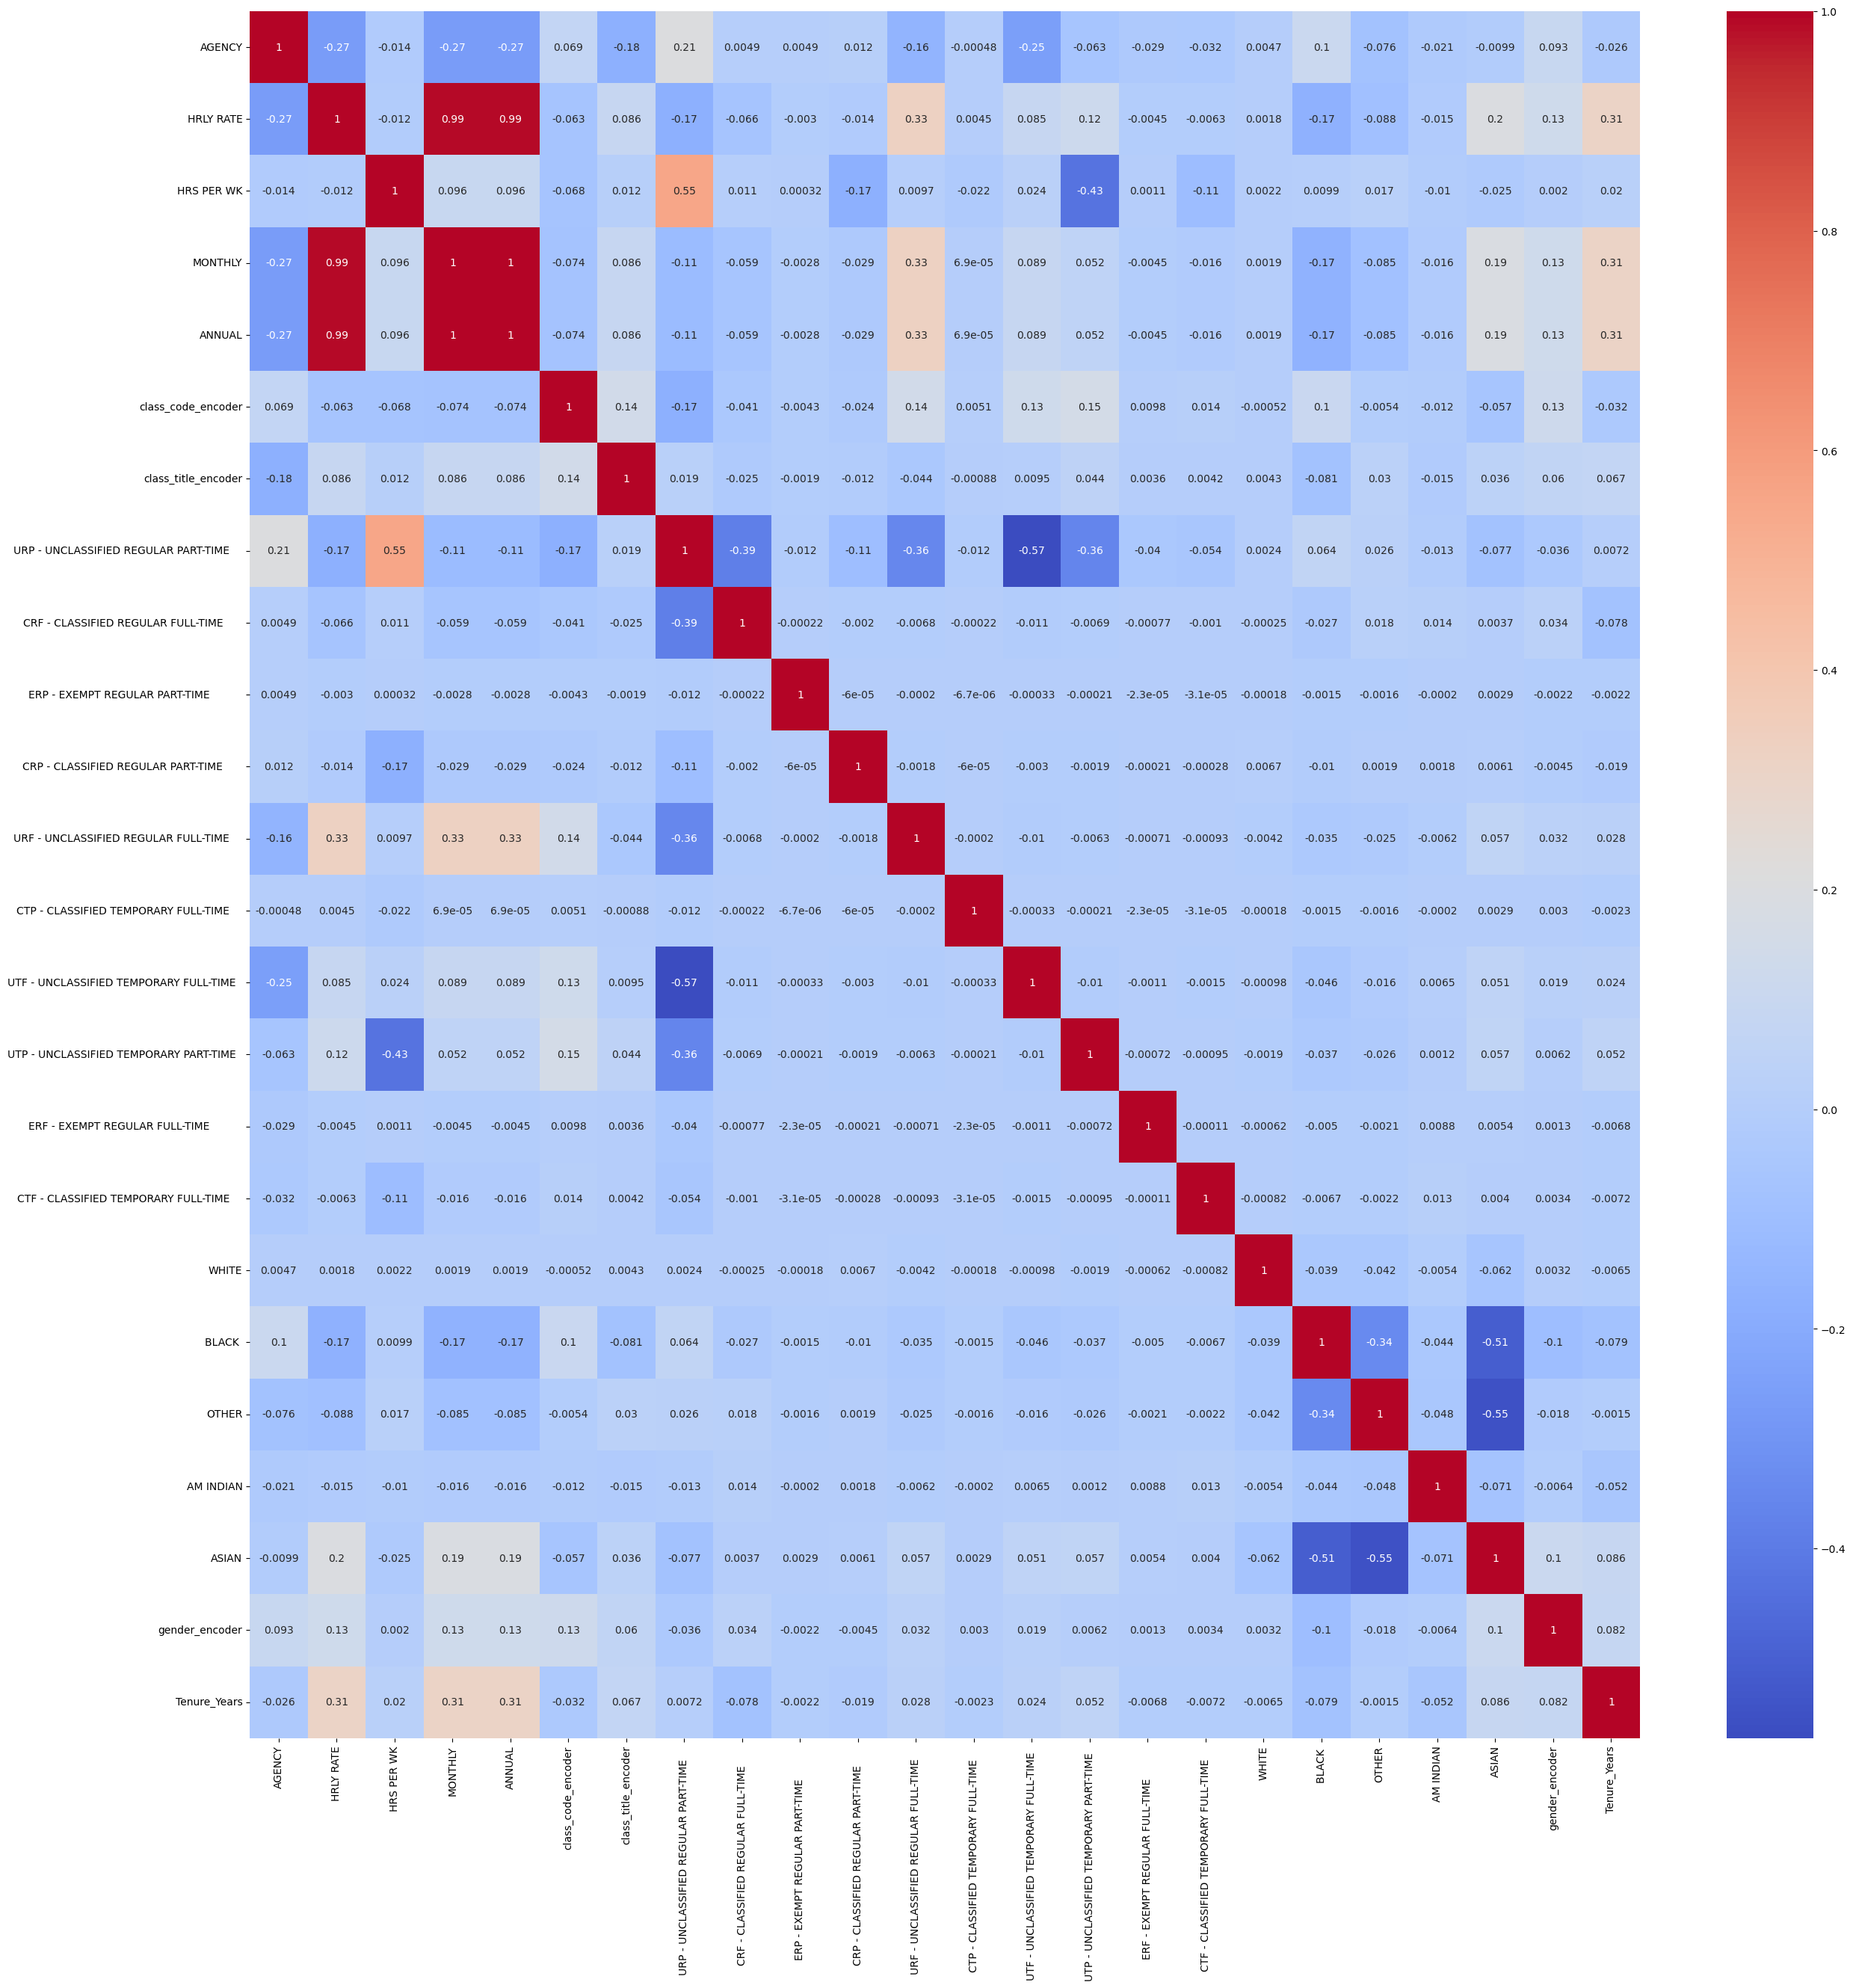

In [62]:
#visualizing correlation using heatmap 
plt.figure(figsize=(30,30))
sns.heatmap(data=data.corr(),annot=True,cmap="coolwarm")
plt.show()

Insights:
    
    1.MONTHLY column highly correlated with ANNUAL column

In [59]:
#Remove unwanted feature
data.drop(["HRLY RATE",'MONTHLY'],axis=1,inplace=True)

Insights :
        MONTHLY and HRLY RATE column is highly correlated with ANNUAL column which is not good for the model and it will lead to overfitting ,so we dropping the columns

In [60]:
#final data before splitting
data.head()

AGENCY  HRS PER WK     ANNUAL  class_code_encoder  class_title_encoder  \
0     241    0.405797  114549.84                1409                  711   
1     212    0.043478   16857.24                 616                  560   
2     241    0.405797  114549.84                1409                  711   
3     212    0.043478   16857.24                 616                  560   
4     696    0.565217   39411.24                 810                  292   

   URP - UNCLASSIFIED REGULAR PART-TIME      \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       1.0   

   CRF - CLASSIFIED REGULAR FULL-TIME        \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   ERP - EXEMPT REGULAR PART-TIME            \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   CRP - CLASSIFIED REGULAR PART-TIME        \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   

   URF - UNCLASSIFIED REGULAR FULL-TIME      ...  \
0                                       0.0  ...   
1                                       0.0  ...   
2                                       0.0  ...   
3                                       0.0  ...   
4                                       0.0  ...   

   UTP - UNCLASSIFIED TEMPORARY PART-TIME    \
0                                       1.0   
1                                       0.0   
2                                       1.0   
3                                       0.0   
4                                       0.0   

   ERF - EXEMPT REGULAR FULL-TIME            \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   CTF - CLASSIFIED TEMPORARY FULL-TIME      WHITE  BLACK   OTHER  AM INDIAN  \
0                                       0.0    0.0     0.0    0.0        0.0   
1                                       0.0    0.0     0.0    0.0        0.0   
2                                       0.0    0.0     0.0    0.0        0.0   
3                                       0.0    0.0     0.0    0.0        0.0   
4                                       0.0    0.0     0.0    1.0        0.0   

   ASIAN  gender_encoder  Tenure_Years  
0    1.0               1     37.013699  
1    1.0               1     10.041096  
2    1.0               1      5.038356  
3    1.0               1      6.457534  
4    0.0               0      4.630137  

[5 rows x 22 columns]

# 6.DATA SPLITTING

In [61]:
# Extracting features from the data
X=data.drop('ANNUAL',axis=1)

In [62]:
# Extracting target from the data
y=data['ANNUAL']

In [63]:
# Splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

# 7. MODEL TRAINING

### 7.1. LINEAR REGRESSION

In [128]:
# Initializing LinearRegression model
linear_model=LinearRegression()

# Fitting the training data to the Linear Regression model
linear_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=linear_model.predict(x_test)

In [129]:
# Evaluating the LinearRegression model's performance by R2_score  
R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.3059221120611504


In [130]:
# R2 score for Linear regression model
LR_score=R2

### 7.2  DECISION TREE

In [66]:
# Initializing DecisionTreeRegressor model
model=DecisionTreeRegressor()

# Fitting the training data to the DecisionTreeRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [67]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score  

R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.9130049845405683


#### 7.2.1. Hyperparameter tuning 1 for Decision Tree

In [79]:
# Initializing DecisionTreeRegressor model
model_ht=DecisionTreeRegressor()

In [80]:
# Creating a dictionary with possible Hyperparameters
params={ 
        'max_depth':[2,5,10,15,19,20],
        'min_samples_split':[2,5,10,15,19,20] ,
        'min_samples_leaf': [2,4,6,8,10,15,20],
        
        }

In [81]:
# Initializing randomizedsearchcv
forest_cv=RandomizedSearchCV(estimator=model_ht,
                            param_distributions=params,
                            scoring='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=3,
                            n_iter=200)

In [83]:
# Fitting the training data to the GridSearchCV
forest_cv.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 5, 10, 15, 19, 20],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 19,
                                                              20]},
                   scoring='r2', verbose=3)

In [85]:
# Getting best hyperparameters
forest_cv.best_params_ 

{'min_samples_split': 20, 'min_samples_leaf': 6, 'max_depth': 20}

#### 7.2.3. Best Decision Tree Model

In [131]:
# Initializing DecisionTreeRegressor model
decision_tree_model=DecisionTreeRegressor( max_depth=20,min_samples_leaf=6,min_samples_split=20)

# Fitting the training data to the DecisionTreeRegressor model
decision_tree_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=decision_tree_model.predict(x_test)

In [132]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score  

R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.935811158993648


In [133]:
# R2 score for DecisionTreeRegressor model
DT_score=R2

## 7.3. RANDOM FOREST

In [71]:
# Initializing RandomForestRegressor model
model=RandomForestRegressor()

# Fitting the training data to the RandomForestRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [72]:
# Evaluating the RandomForestRegressor model's performance by R2_score  

R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.9451227162934162


#### 7.3.1. Hyperparameter tuning 1 for Random Forest

In [94]:
# Initializing RandomForestRegressor model
model_ht=RandomForestRegressor()

In [98]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200],
        'max_depth': [5,10,15,20],
        'min_samples_split': [5,10,15,20],
        'min_samples_leaf':[5,10,15,20],
        'random_state': [43] ,
        }

In [99]:
# Initializing randomizedsearchcv
forest_cv=RandomizedSearchCV(estimator=model_ht,
                            param_distributions=params,
                            scoring='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=3,
                            n_iter=200)

In [100]:
# Fitting the training data to the GridSearchCV
forest_cv.fit(x_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'min_samples_leaf': [5, 10, 15, 20],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [100, 200],
                                        'random_state': [43]},
                   scoring='r2', verbose=3)

In [101]:
# Getting best hyperparameters
forest_cv.best_params_

{'random_state': 43,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 20}

####  7.3.3. Best Random Forest Model

In [135]:
# Initializing RandomForestRegressor model
random_forest_model=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_leaf=5,min_samples_split=5,random_state=43)

# Fitting the training data to the RandomForestRegressor model
random_forest_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=random_forest_model.predict(x_test)

In [136]:
# Evaluating the RandomForestRegressor model's performance by R2_score  

R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.9452378637078864


In [137]:
# R2 score for RandomForestRegressor model
RF_score=R2

##  7.4. ARTIFICIAL NEURAL NETWORK(ANN)

In [75]:
# Initializing MLPRegressor model
model=MLPRegressor()

# Fitting the training data to the MLPRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [76]:
# Evaluating the MLPRegressor model's performance by R2_score  

R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.47900107544785897


#### 7.4.1. Hyperparameter tuning for Artificial Neural Network(ANN)

In [107]:
# Initializing  model
model_ht=MLPRegressor()

In [111]:
params={'learning_rate_init':[0.001,0.005,0.2,0.5,1],
       'max_iter':[100,200,300,400,500]
       }

In [120]:
# Create the RandomizedSearchCV object
ann_cv = RandomizedSearchCV(estimator=model,
                                   param_distributions=params, 
                                   n_iter=10,
                                   cv=3, 
                                   random_state=42)

In [125]:
ann_cv.fit(x_train,y_train)# random state 25 in train test split

RandomizedSearchCV(cv=3, estimator=MLPRegressor(),
                   param_distributions={'learning_rate_init': [0.001, 0.005,
                                                               0.2, 0.5, 1],
                                        'max_iter': [100, 200, 300, 400, 500]},
                   random_state=42)

In [126]:
#getting the best params
ann_cv.best_params_

{'max_iter': 400, 'learning_rate_init': 0.005}

#### 7.4.2. Best MLPRegressor Model

In [138]:
# Initializing MLPRegressor model
ann_model=MLPRegressor(learning_rate_init=0.005,max_iter=400)

# Fitting the training data to the MLPRegressor model
ann_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=ann_model.predict(x_test)

In [139]:
# Evaluating the MLPRegressor model's performance by R2_score 

R2=r2_score(y_test,y_pred)
print('The R2_score is ',R2)

The R2_score is  0.5652452881139274


In [140]:
# R2 score for MLPRegressor model
ANN_score=R2

## 7.5 XGBoost

In [81]:
#importing xgboostregressor
from xgboost import XGBRegressor

#initializing xgboost
xgb=XGBRegressor(alpha=0.1,lambda_=0.1,max_depth=3)

#fitting the training data to the xgboostregressor
xgb.fit(x_train,y_train)



#predicting the target for testing data
y_hat=xgb.predict(x_test)

In [82]:
# Evaluating the XGBRegressor model's performance by R2_score
model_accuracy=r2_score(y_hat,y_test)
print("the R2_score is ",model_accuracy)

the R2_score is  0.7688364653670374


### 7.5.1 Hyperparameter tuning for XGBoost

In [83]:
#create an abject for XGBregressor model
h_model=XGBRegressor()

In [84]:
## Creating a dictionary with possible Hyperparameters
param_grid = {"gamma":[0,0.1,0.2,0.4],
             "learning_rate":[0.01,0.03,0.06,0.1],
             "max_depth":[5,6,7,8,9],
             "n_estimators":[50,65,80],
             "alpha":[0,0.1,0.5,1],
             "lambda":[1,1.5,2,3]}
 

In [85]:
# Create the RandomizedSearchCV object
rcv = RandomizedSearchCV(estimator=h_model, 
                          scoring="r2", param_distributions=param_grid,
                          cv=3, verbose=2, n_jobs=-1,n_iter=300)

In [86]:
rcv.fit(x_train, y_train)# random state 25 in train test split

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'lambda': [1, 1.5, 2, 3],
                                        'learning_rate': [0.01, 0.03, 0.06,
                                                          0.1],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'n_estimators': [50, 65, 80]},
                   scoring='r2', verbose=2)

In [87]:
rcv.best_params_

{'n_estimators': 80,
 'max_depth': 9,
 'learning_rate': 0.1,
 'lambda': 1,
 'gamma': 0.1,
 'alpha': 0.5}

In [89]:
#importing xgboostregressor
from xgboost import XGBRegressor

#initializing xgboost
xgb=XGBRegressor(n_estimators= 80,max_depth= 9,learning_rate= 0.1 ,gamma= 0.1,alpha= 0.5)

#fitting the training data to the xgboostregressor
xgb.fit(x_train,y_train)



#predicting the target for testing data
y_hat=xgb.predict(x_test)

In [90]:
# Evaluating the XGBRegressor model's performance by R2_score
model_accuracy=r2_score(y_hat,y_test)
print("the R2_score is ",model_accuracy)

the R2_score is  0.8941953902409763


In [120]:
# R2 score for  XGBOOSt model
XGB_score=model_accuracy

## 8.MODEL COMPARISON REPORT

In [146]:
# Creating a dictionary for the model and their corresponding r2_score 
comparison_dict={'Model':['LinearRegression' ,'DecisionTreeRegressor','RandomForestRegressor','MLPRegressor',"XGBoost"],
                    'R2_score':[LR_score ,DT_score,RF_score,ANN_score,XGB_score]
                }

# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)
 
 
#sorting the dataframe by the r2_score column in descending order
comparison_df=comparison_df.sort_values(by='R2_score', ascending=False)

# Setting the index as the model column
comparison_df=comparison_df.set_index('Model')

# Visualizing the dataframe
print('The DataFrame showing performance of different models:')
print("")
print(comparison_df)

The DataFrame showing performance of different models:

                       R2_score
Model                          
RandomForestRegressor  0.945238
DecisionTreeRegressor  0.935811
XGBoost                0.894195
MLPRegressor           0.565245
LinearRegression       0.305922


In [142]:
print('The maximum R2_score',comparison_df.R2_score[0],'is obtained from',comparison_df.index[0],'Model')

The maximum R2_score 0.9452378637078864 is obtained from RandomForestRegressor Model


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


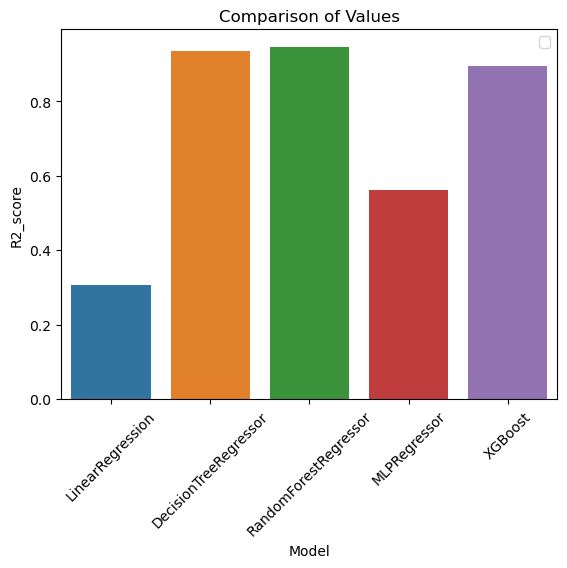

In [150]:
# Creating a dictionary for the model and their corresponding r2_score 
df_r2score={'Model':['LR' ,'DTR','RFR','MLPR',"XGBoost"],
                     'R2_score':[LR_score ,DT_score,RF_score,ANN_score,XGB_score]
                }
## Creating dataframe 
df_r2score=pd.DataFrame(df_r2score)

#visualizing the df_r2score dataframe
sns.barplot(x='Model', y='R2_score', data=df)
plt.xlabel('Model')
plt.ylabel('R2_score')
plt.title('Comparison of Values')
plt.xticks(rotation=45 )
plt.legend()
plt.show()


## CONCLUSION
    
    1.we have both numerical and categorical feature,and we dropped some unwanted columns in preprocessing and we use           Onehotencoding and label encoder for converting categorical data into numerical data.
   
    2.we use five model here and we got over optimal accuracys.
   
    3.Hence the performance is good in RandomForestRegressor comparing to other models.
    
    4.THEREFORE THE BEST MODEL IS RANDOM FOREST REGRESSOR for this dataset.

## 9. REPORT ON CHALLENGES FACED

1.Data Quality in this taxessalarypred datasets are not good some columns are have less 10% of data and some columns have most valued 0 this makes difficult to do in the prerprocessing

2.we got a large dataset with  149481(records) and  21(features) its a big task in preprocessing .

3.we use some of the feature engineeing technique to make this data into some  meaningful data that will increase the performance in tree based algorithms 

4.In encoding part datetime encoding was little bit confusing and we extract new column tenure_years.

5.when its comes to model creation and hyperprameter tuning the computational processes takes longer because of the size of the data.

# Project Details:
### Project Team ID:
PTID-CDS-JAN-25-2367
    
### Project ID:
PRCP-1024-TexassSalaryPred

### Team Members:
    
     
    1.RAJESH KANNAN - rajeshkannanemailpdkt@gmail.com
    2.THIRUMALAI  -thiru292004@gmail.com
    3.SABARISHAN  -sabarishan342002@gmail.com
    4.VIMAL RAJ J - mrvimalofficiall@gmail.com
    